# Cleaning Bot Movement Classification

* by [Sounam Ghosh]



During the testing phase of the automated cleaning gathered some readings from the robot during its movement,the goal is to be able to predict the position label of the moving robot based on the sensor readings from the robot.

The data is collected during the course of a robot navigating through a room following the moping the floor in a particular direction, for 4 rounds. 

Also, I attempted in trying out several models. During the EDA of this dataset (sensor reading), find out is non-linear in nature.

Basically label down the collected data based on their movement 
* Slight- right - turn
* Slight- left - turn
* Move Forward
* Sharp - right - turn 

In [28]:
# Importing the libraries needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.svm import SVC

In [31]:
# importing the dataset
data = np.loadtxt("sensor_readings_24.csv", delimiter=',', dtype=np.str)

raw_data = pd.DataFrame(data[:,:24], dtype=np.float)
raw_data = pd.concat([raw_data, pd.DataFrame(data[:, 24], columns=['Label'])], axis=1)
                      
print("Data size - ", raw_data.shape)

Data size -  (5456, 25)


In [32]:
print ("Sample raw data")
raw_data.head(n=10)

Sample raw data


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Label
0,0.438,0.498,3.625,3.645,5.0,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
5,0.439,0.498,3.626,3.629,5.0,2.918,5.000,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn
6,0.440,5.000,3.627,3.628,5.0,2.919,3.028,2.346,2.330,2.638,...,0.588,0.501,0.492,0.504,0.451,0.433,0.446,0.444,0.432,Slight-Right-Turn
7,0.444,5.021,3.631,3.634,5.0,2.919,5.000,2.626,2.327,2.638,...,0.595,0.500,0.491,0.503,0.453,0.436,0.448,0.444,0.436,Slight-Right-Turn
8,0.451,5.025,3.635,3.639,5.0,2.920,3.027,2.620,2.323,2.632,...,0.595,0.499,0.491,0.502,0.457,0.440,0.453,0.454,0.442,Sharp-Right-Turn
9,0.458,5.022,3.640,3.644,5.0,2.922,5.000,2.346,2.321,2.628,...,0.590,0.496,0.490,0.498,0.462,0.444,0.458,0.461,0.449,Sharp-Right-Turn


In [6]:
# Describe the dataset
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


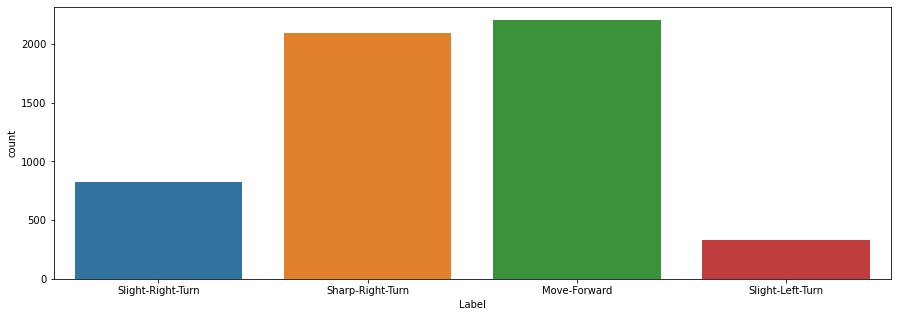

In [36]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='Label',data=raw_data)

# Observation
From the plot above, it is evident of a class inblance happening because Slight - Left- turn label and Slight - right -turn labels have have very low proportions in the training data as compared to the other labels.This inbalance might influence our result as biased towards the majority label, causing bad classification of the minority label. [](http://)

In [37]:
# label count
raw_data.groupby(['Label']).count()[0]

Label
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Left-Turn      328
Slight-Right-Turn     826
Name: 0, dtype: int64

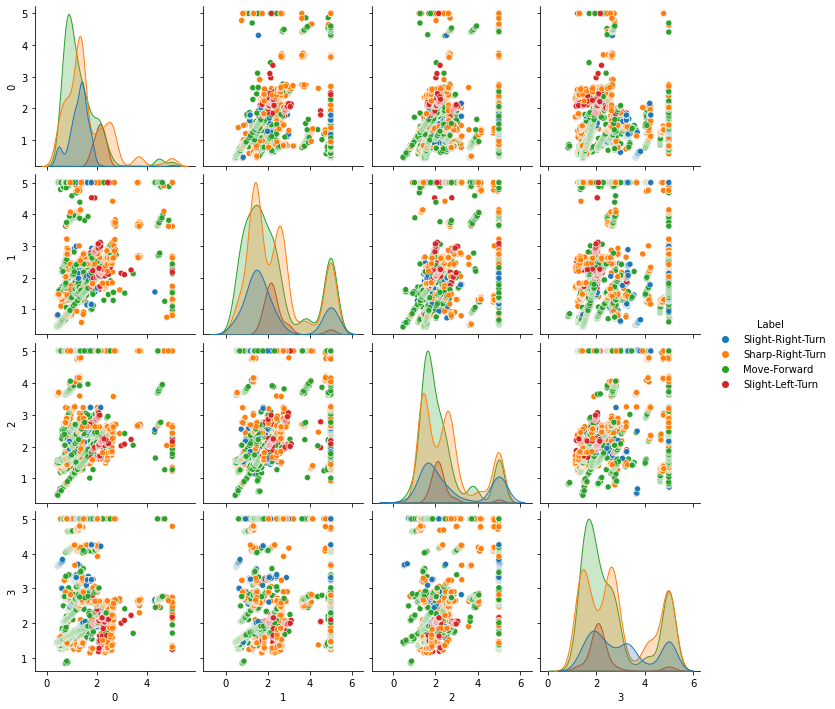

In [39]:
# pair plot of the data
colss = raw_data.columns[0:4]
sns.pairplot(raw_data, vars=colss, hue='Label')


# Feature Selection

The fisher score is a good discriminating function for finding features that contribute more to the data. 
The code below shows how to calculate it. You can find the latest fisher calculation code 


In [10]:
# helper function for evalating the fisher ndex
def fisher_index_calc(trainingSet, labelSet):
    (dim1_T, dim2_T) = trainingSet.shape
    (dim1_L, dim2_L) = labelSet.shape

    # create the fisher output variable - A vector of all the features
    fisher_ratios = np.zeros((1, dim2_T), dtype=float).flatten()
    # It's expected that the dim1_T and dim1_L be of the same size, else this input parameters is nulled.
    if dim1_L != dim1_T:
        return fisher_ratios

    # First extract out the number of features available.
    # grouped both data together, and create a pandas dataframe from it.
    train1 = pd.DataFrame(trainingSet)
    label1 = pd.DataFrame(labelSet, columns=['LABEL'])
    grouped = pd.concat([train1, label1], axis=1)

    # fetch the number of classes
    (no_classes, demo) = grouped.groupby('LABEL').count()[[0]].shape
    #print grouped

    # loop through all features
    for j in range(dim2_T):
        # the variance of the feature j
        j_variance = np.var(trainingSet[:,j])
        j_mean = np.mean(trainingSet[:,j])
        j_summation = 0
        for k in range(no_classes):
            output = grouped.groupby('LABEL').count()[[j]]
            k_feature_count = output.iloc[k,0]
            # mean for class k of feature j
            output = grouped.groupby('LABEL').mean()[[j]]
            k_feature_mean = output.iloc[k,0]
            currentSum = k_feature_count * np.square((k_feature_mean - j_mean))
            j_summation = j_summation + currentSum
        fisher_ratios[j] = j_summation / np.square(j_variance)

    return fisher_ratios

In [11]:
training_set = raw_data.iloc[:, :(raw_data.shape[1]-1)].values
label_set = raw_data.iloc[:, (raw_data.shape[1]-1):].values


<Figure size 1656x720 with 0 Axes>

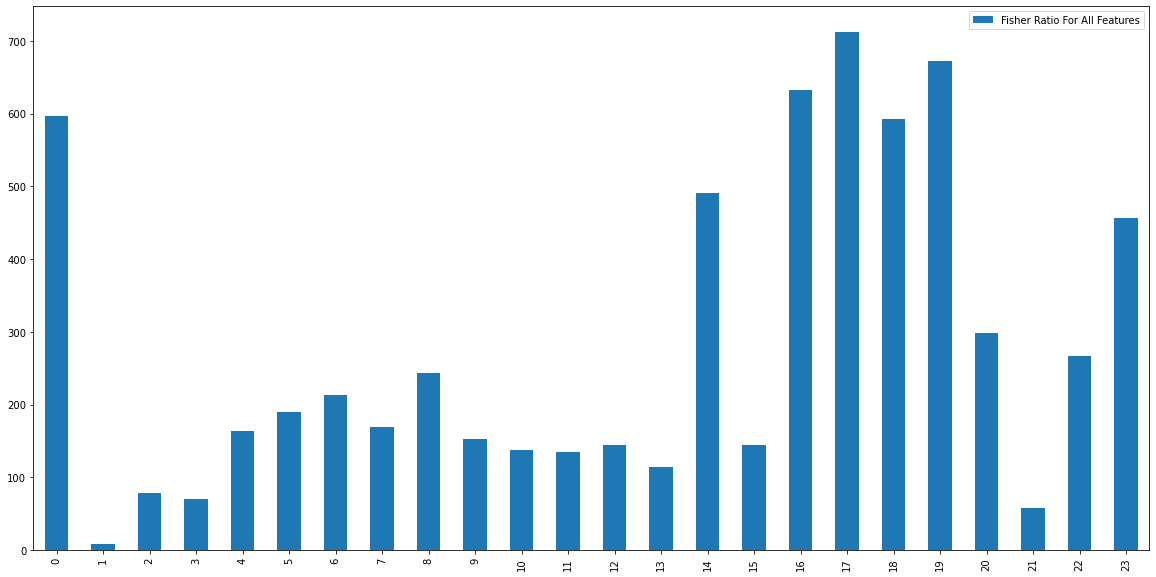

In [12]:
# calculates the fisher score of the sensors features
fisher_scores = fisher_index_calc(training_set, label_set)

fig= plt.figure(figsize=(23, 10))
df = pd.DataFrame({'Fisher Ratio For All Features': fisher_scores})
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [42]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 300:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
training_set_fisher = np.delete(training_set, to_remove, 1)
training_set_fisher.shape


(5456, 7)

In [14]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(raw_data.iloc[:, 24].values)
class_names = labelEn.classes_
class_names

array(['Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn',
       'Slight-Right-Turn'], dtype=object)

# Performaing PCA

100.0


<AxesSubplot:>

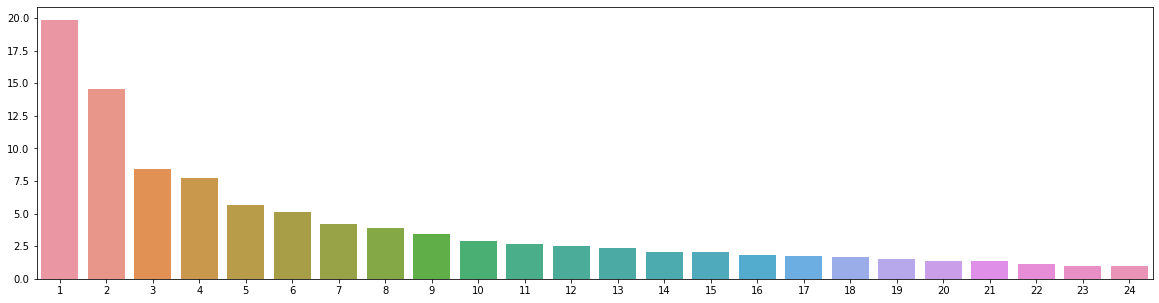

In [15]:
from sklearn.decomposition import PCA

pca = PCA()

pca_sets = pca.fit_transform(training_set)
print (100 * np.sum(pca.explained_variance_ratio_))

x1 = np.arange(1, pca.explained_variance_ratio_.shape[0]+1, 1)
fig = plt.figure(figsize=(20,5))
sns.barplot(x = x1, y = 100 * pca.explained_variance_ratio_)

#### Observation
The data doesn't require to be normalize, it already looks normalized

In [16]:
# normalizaling the data with standard scaler


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalled_set = scaler.fit_transform(training_set)

# Scalling and PCA Observation
After testing several models based on the cross validation, doing PCA and Standard Scaler doesn't contribute any much difference to the model.
Moreover, the dataset already looks scaled properly. 

In [17]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(training_set_fisher, encoded_labels, test_size=0.3, shuffle=False)


# Class Inbalance
The output class for this dataset is highly inbalance which has the chance of creating basis in the model. I created class weights to compensate for this inbalance. 
This weight can be used in a model.

In [18]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.testing import assert_almost_equal

# this function creats a class weight

def create_class_weight(y):
    classes = np.unique(y)
    cw = compute_class_weight("balanced", classes, y)
    # evaluate if weights are truly balanced
    # total effect of samples is preserved
    class_counts = np.bincount(y)
    # print (class_counts)
    assert_almost_equal(np.dot(cw, class_counts), y.shape[0])
    assert cw[0] < cw[1] < cw[2]   

    return cw

label_weights = create_class_weight(encoded_labels)
# Convert class_weights to a dictionary to pass it to class_weight in model.fit
label_weights = dict(enumerate(label_weights))

C:\Users\SOUNAM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SOUNAM\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2 3], y=[3 3 3 ... 1 0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [19]:
# function for confusion matrix

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Logistic Regression
This is the first classifier used here. The performance is quite poor. The task is non-linear

In [20]:
# defining the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer

lg_model = LogisticRegression(C= 86, solver='liblinear', max_iter = 1000, multi_class = 'auto', random_state = 0, class_weight= label_weights)

# commence training -
lg_model.fit(X_train, y_train)

# predict the result
y_pred = lg_model.predict(X_test)
print ("Logisitic Regression Result Considering Class Inbalance")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

### Without considering the class inbalance
lg_model = LogisticRegression(C= 86, solver='liblinear', max_iter = 1000, multi_class = 'auto', random_state = 0)

# commence training -
lg_model.fit(X_train, y_train)

# predict the result
y_pred = lg_model.predict(X_test)
print ("Logisitic Regression Result Without considering Class Inbalance")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Logisitic Regression Result Considering Class Inbalance
Performance - 66.40195479535737%
Logisitic Regression Result Without considering Class Inbalance
Performance - 62.12583995113011%


[[379 277   3  11]
 [ 36 549  13  19]
 [ 27  33  47   0]
 [ 66 134   1  42]]


<AxesSubplot:title={'center':'Confusion matrix For MLP Model'}, xlabel='Predicted label', ylabel='True label'>

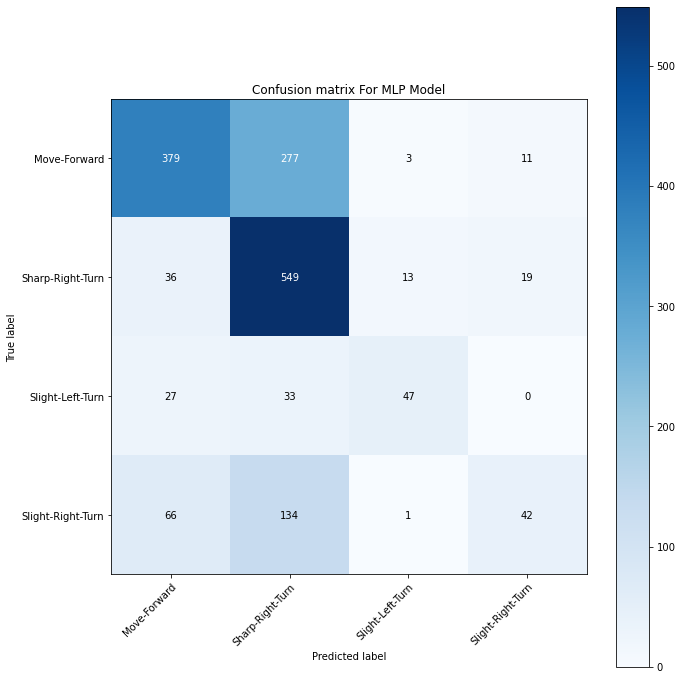

In [21]:
# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix For MLP Model')

# Multi-layer Perceptron
MLP can handle both linear and non-linear task. MLP performed best here and it was able to handle the class inbalance case even without supplying a class weight.

In [22]:
# Creates the MLP Classifier
from sklearn.neural_network import MLPClassifier

# After training with Cross validation, this was derived as the best model.
mlp = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= (40,), solver= 'lbfgs', random_state=1, max_iter=1000)

# commence training -
mlp.fit(X_train, y_train)

# predict the result
y_pred = mlp.predict(X_test)
print ("MLP Result Without considering Class Inbalance")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")


MLP Result Without considering Class Inbalance
Performance - 93.64691508857666%


C:\Users\SOUNAM\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[616  36   2  16]
 [ 10 596   9   2]
 [  1   6 100   0]
 [  7  15   0 221]]


<AxesSubplot:title={'center':'Confusion matrix For MLP Model'}, xlabel='Predicted label', ylabel='True label'>

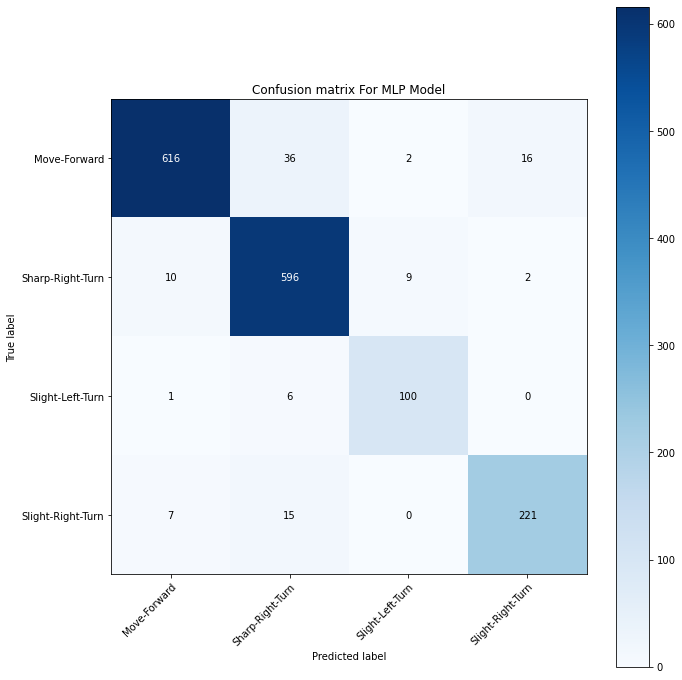

In [24]:
# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix For MLP Model')

# Support Vector Machine
SVM result improved after using the fisher based feature selection.

In [25]:
# defining the SVC model
from sklearn.metrics import accuracy_score

svc_model = SVC(C=26, degree=1, kernel='rbf', gamma='scale', class_weight=label_weights)

# commence training
svc_model.fit(X_train, y_train)

# predict the result
y_pred = svc_model.predict(X_test)
print ("Support Vector Machines Result Considering Class Inbalance")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

svc_model = SVC(C=26, degree=1, kernel='rbf', gamma='scale')

# commence training
svc_model.fit(X_train, y_train)

# predict the result
y_pred = svc_model.predict(X_test)
print ("Support Vector Machines Result Without considering Class Inbalance")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Support Vector Machines Result Considering Class Inbalance
Performance - 89.43188759926696%
Support Vector Machines Result Without considering Class Inbalance
Performance - 91.08124618204032%


[[581  58   2  29]
 [ 13 583   5  16]
 [  4   3 100   0]
 [  5  11   0 227]]


<AxesSubplot:title={'center':'Confusion matrix For MLP Model'}, xlabel='Predicted label', ylabel='True label'>

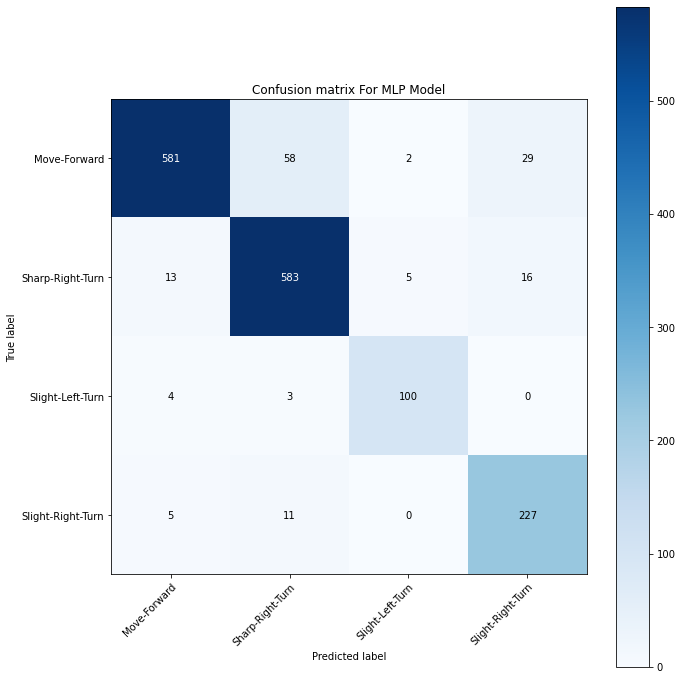

In [26]:
# Plot non-normalized confusion matrix

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix For MLP Model')